#  LGM - Data science  VIP, Iris flower classification ML project

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,8)

# Image of the Iris flowers

<img src = 'iris_image.png' style= 'width:900px; heigth:900px'/>

In [ ]:
#we can also import iris data set from pydataset
from pydataset import data
iris_df = data('iris')

In [3]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [5]:
#information and statistical description of each variable
iris_df.info()
iris_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


it seems to be that the data containing no null values and outliers

In [6]:
#to find no of classes in target column
iris_df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:>

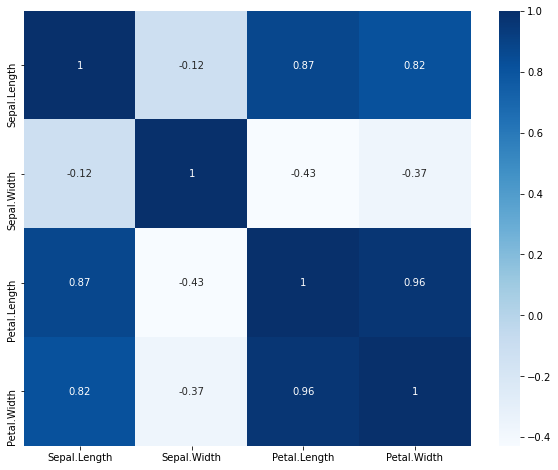

In [7]:
sns.heatmap(iris_df.corr(),annot=True,cmap='Blues')

# Distribution plot

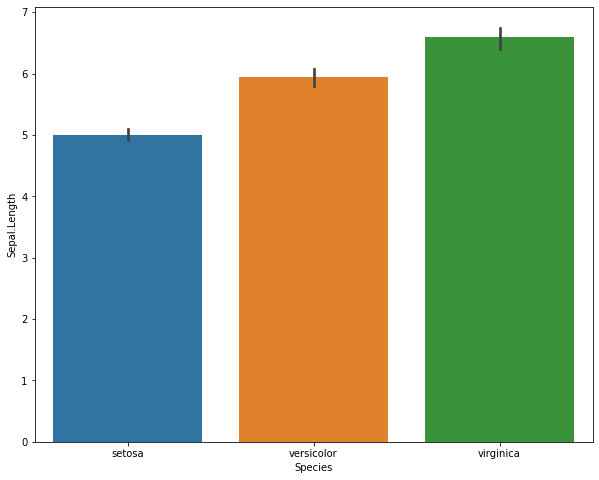

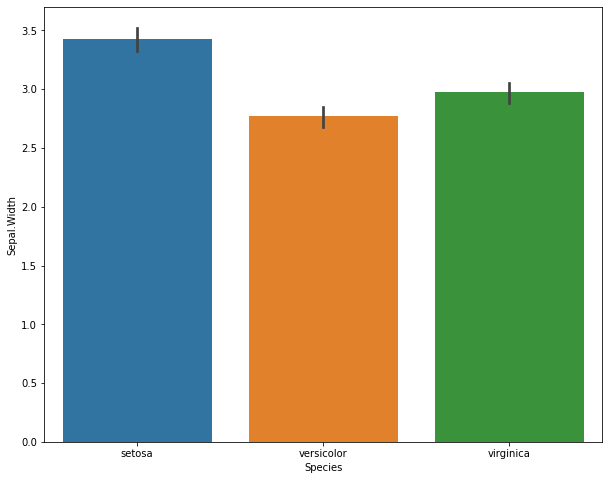

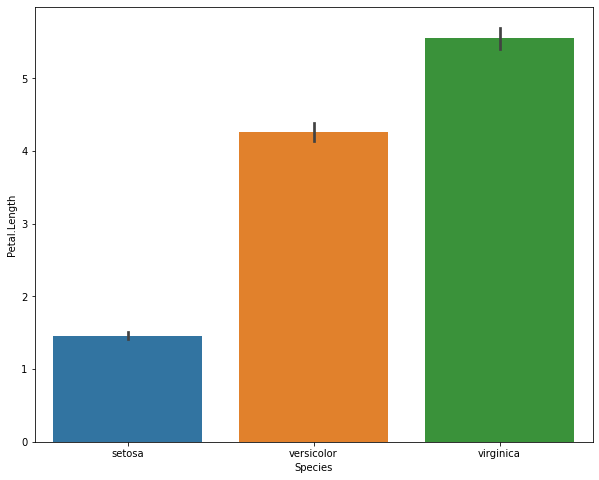

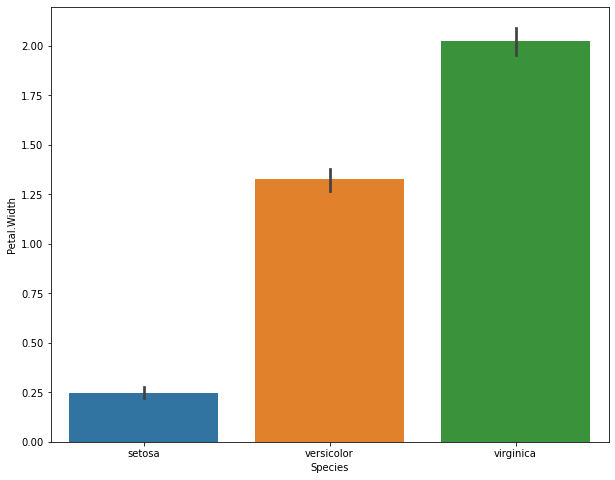

In [8]:
columns = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']
for i in columns:
    sns.barplot(data=iris_df,x='Species',y=i)
    plt.show()

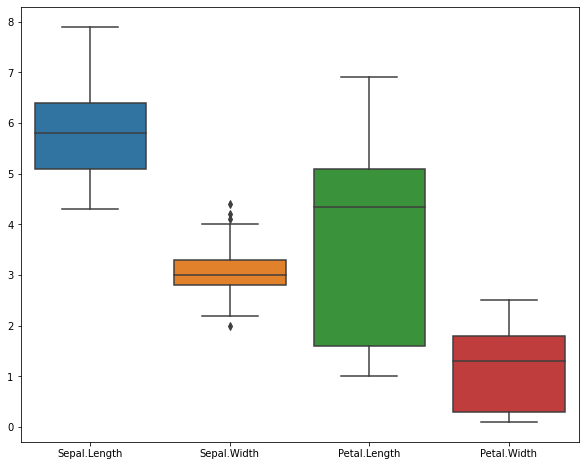

In [9]:
sns.boxplot(data=iris_df)
plt.show()

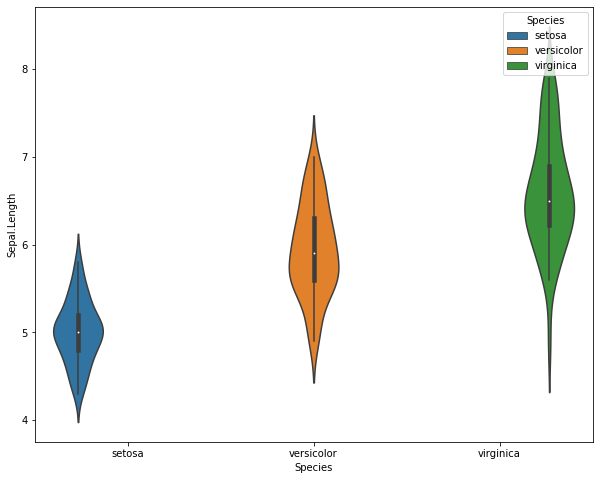

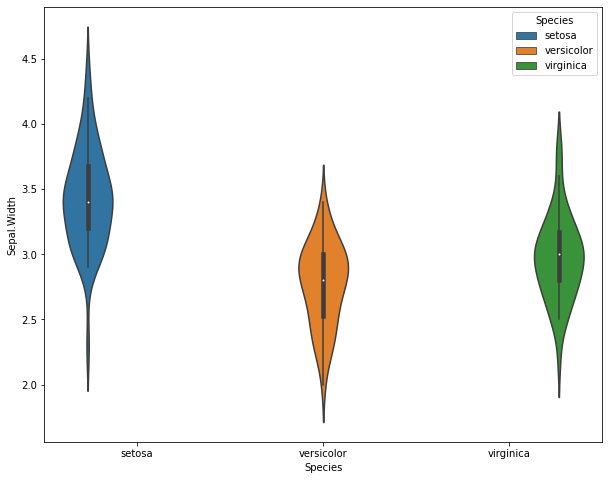

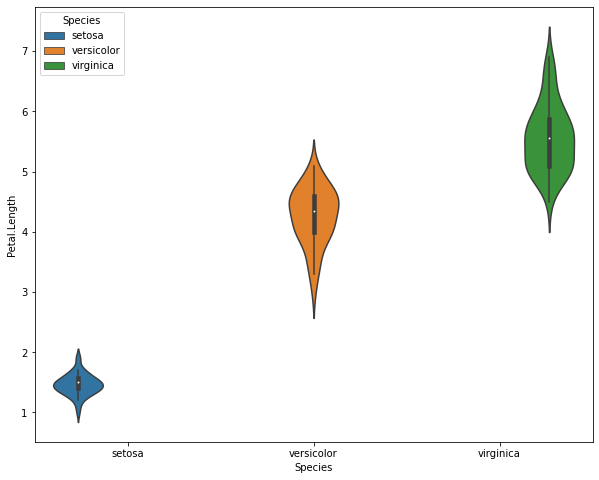

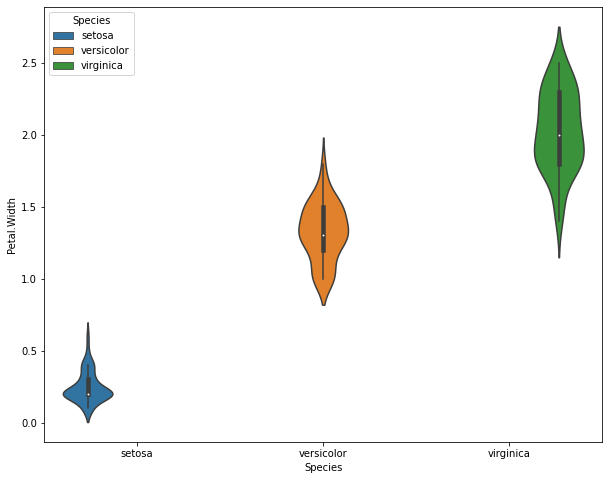

In [10]:
for i in columns:
    sns.violinplot(data=iris_df,x='Species',y=i,hue='Species')
    plt.show()

# Relationship plot

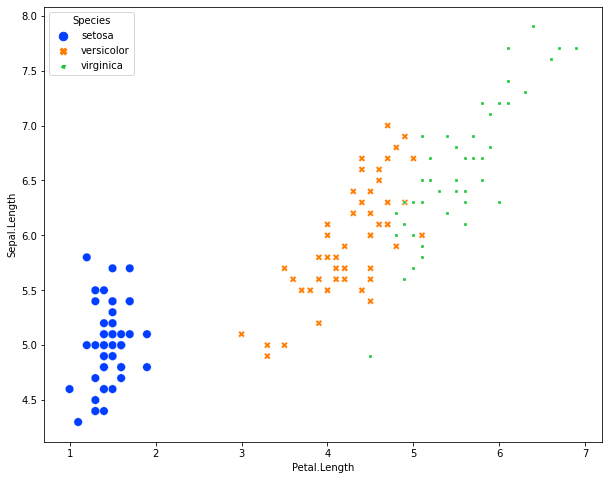

In [11]:
sns.scatterplot(data=iris_df,x='Petal.Length', y='Sepal.Length',hue='Species', 
                style='Species',size='Species',palette='bright')
plt.show()

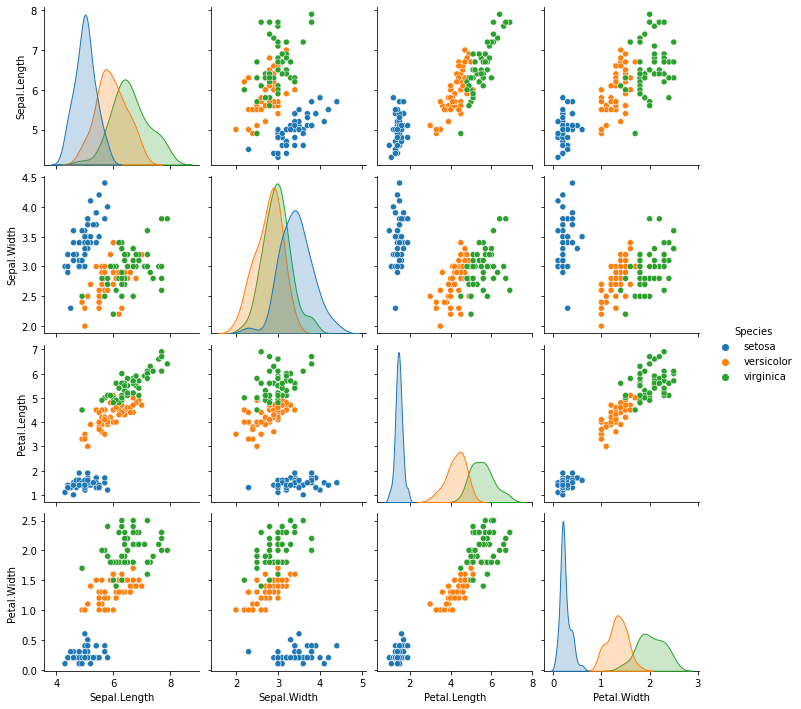

In [12]:
#both distribution and relationship plot
sns.pairplot(data=iris_df,hue='Species')
plt.show()

# Label encoding

In [13]:
#Categorical clean up
cat_clean_up = {'Species':{'setosa':1,'versicolor':2,'virginica':3}}
iris_df.replace(cat_clean_up,inplace=True)
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


In [14]:
x= iris_df.drop('Species',1)
y = iris_df['Species']

## 

In [15]:
#spitting the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('The accuracy is', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
The accuracy is 0.9777777777777777


# K-Nearest Neighbour

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred1 = knn.predict(x_test)

In [21]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print('The accuracy is', accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
The accuracy is 0.9777777777777777


# Support Vector Machine

In [22]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred2 = svm.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print('The accuracy is', accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
The accuracy is 0.9777777777777777
